# Classifying Text

- Checkin on Reddit Posts
- Codealong on text classification using 20_newsgroups
- Independent work on reddit classification

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
news = fetch_20newsgroups() #can we identify the news story based on the text of the news story 

In [4]:
print(news.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [11]:
#space and autos
news = fetch_20newsgroups(categories = ['rec.autos', 'sci.space']) #two target variables

In [9]:
news.data[0]

"From: prb@access.digex.com (Pat)\nSubject: Re: Proton/Centaur?\nOrganization: Express Access Online Communications USA\nLines: 15\nNNTP-Posting-Host: access.digex.net\n\n\nWell thank you dennis for your as usual highly detailed and informative \nposting.   \n\nThe question i have about the proton, is  could it be  handled at\none of KSC's spare pads, without major  malfunction,  or could it be\nhandled at kourou  or Vandenberg?   \n\nNow if it uses storables,  then  how long would it take for the russians\nto equip something at cape york?\n\nIf  Proton were launched from a western site,  how would it compare to the\nT4/centaur?   As i see it, it should lift  very close to the T4.\n\npat\n"

In [18]:
news.target[0] #output of 0 means first category, 1 means 2nd category 
#gives you which kind of article the one in the brackets is
#our first article is about space, bc the output is 1

1

In [15]:
news.target[:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

In [21]:
news.data[5]

'From: stecz@pencom.com (John Steczkowski)\nSubject: Re: $6700 for hail damage - a record?\nReply-To: stecz@pencom.com\nDistribution: usa\nOrganization: Pencom Software\nLines: 22\n\nIn article <1993Apr19.235711.7285@cactus.org> boyle@cactus.org (Craig Boyle)  \nwrites:\n> \n> \n> My 90 Integra was hit hard in the 3/25 hailstorm in Austin, TX. \n> The insurance company cut me a check for $6600 ($100 deductible)\n> last week.  Is this a record? Anybody else had settlements from\n> the same hailstorm yet?\n> \n> Craig\n\n\nRumor has it that a guy at Dell Computer had his Miata totalled, so that would  \nbe about $10k.\n\n\n--\n--\n  John Steczkowski                        stecz@pencom.com\n    The Constitution grants you the right to life, liberty, and the\n    *pursuit* of happiness.  It does not attempt to guarantee that\n    everyone *will* be happy.\n'

In [23]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [24]:
cvect = CountVectorizer()

In [44]:
a = 'Jacob is tired and wants nachos. I would prefer veggie nachos.'
b = 'Erika does not eat nachos usually. Tino is into them.'

In [48]:
X = cvect.fit_transform([a, b]) #in brackets bc u want it as a list; called a sparse matrix

In [49]:
cvect.get_feature_names() #broke string apart into tokens in alphabetical order

['and',
 'does',
 'eat',
 'erika',
 'into',
 'is',
 'jacob',
 'nachos',
 'not',
 'prefer',
 'them',
 'tino',
 'tired',
 'usually',
 'veggie',
 'wants',
 'would']

In [53]:
import numpy as np
import pandas as pd
X.toarray()
# output tells you how many of each word there are in each sentence

array([[1, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [54]:
pd.DataFrame(X.toarray(), columns = cvect.get_feature_names())

,and,does,eat,erika,into,is,jacob,nachos,not,prefer,them,tino,tired,usually,veggie,wants,would
0,1,0,0,0,0,1,1,2,0,1,0,0,1,0,1,1,1
1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0


In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cvect = CountVectorizer(ngram_range = (1,3)) #changed ngram range in this version
X = cvect.fit_transform([a, b])

a = 'Jacob is tired and wants nachos. I would prefer veggie nachos.'
b = 'Erika does not eat nachos usually. Tino is into them.'

cvect.get_feature_names() 

import numpy as np
import pandas as pd

pd.DataFrame(X.toarray(), columns = cvect.get_feature_names())

,and,and wants,and wants nachos,does,does not,does not eat,eat,eat nachos,eat nachos usually,erika,...,usually tino,usually tino is,veggie,veggie nachos,wants,wants nachos,wants nachos would,would,would prefer,would prefer veggie
0,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
1,0,0,0,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0


In [69]:
X = news.data
y = news.target

In [70]:
#we need a model
from sklearn.linear_model import LogisticRegression

In [71]:
#instatiate the model and CountVectorizer
cvect = CountVectorizer()
lgr = LogisticRegression()

In [73]:
#training and teting split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [76]:
len(X_train), len(X_test) # you have more data to train with than to test with

(890, 297)

In [79]:
#we need to train
X_vect_train = cvect.fit_transform(X_train)
X_vect_test = cvect.transform(X_test)

In [81]:
lgr.fit(X_vect_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
# we need to evaluate
lgr.score(X_vect_test, y_test)
#output tells you percentage of how well it matched articles to correct category (autos vs space)

0.9865319865319865

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

In [87]:
lgr.coef_ #builds an equation with coeficients 

array([[-0.01613786,  0.03515136,  0.00249994, ..., -0.00690739,
         0.00237938, -0.00241917]])

In [90]:
important_words = pd.DataFrame({'word': cvect.get_feature_names(), 'coef': lgr.coef_[0]})

In [95]:
important_words.head(5)

,word,coef
0,00,-1.613786e-02
1,000,3.515136e-02
2,0000,2.499943e-03
3,00000,4.999886e-03
4,000000,-5.985193e-07


In [112]:
large = important_words.nlargest(5, 'coef')

In [113]:
small = important_words.nsmallest(5, 'coef')

In [114]:
plot_frame = pd.concat([large, small])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

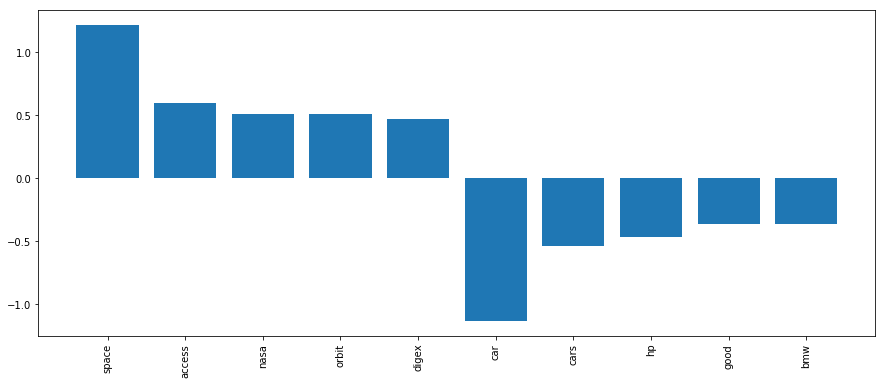

In [118]:
plt.figure(figsize = (15,6))
plt.bar(plot_frame['word'], plot_frame['coef'])
plt.xticks(rotation = 90)